In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Importing the data file through simple read excel panda's library

In [81]:
df = pd.read_excel(r'C:\Users\ACER\Downloads\retail\Retail.xlsx')

#### Some basis exploratory data analysis 

In [19]:
df.shape

(541909, 8)

In [20]:
df.size

4335272

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### Checking for the descriptive analysis

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


#### Checking for the data types for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Some analysis on the missing values

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Base on analysis on the missing columns the description columns have less than one percent missing values and the customerid have more than 24 percent missing values

In [36]:
df['Description'].isna().value_counts(normalize=True)

False    0.997317
True     0.002683
Name: Description, dtype: float64

In [37]:
df['CustomerID'].isna().value_counts(normalize=True)

False    0.750733
True     0.249267
Name: CustomerID, dtype: float64

#### United Kingdom has the highes amount of quantity purchased and Saudi Arabia have the least

In [10]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

#### A streamed data sample to the UK,the analysis shows that the highest quantity sold comes from Uk with a maximum of 80995 quantity bought, though the minimum might be an error or outliner

In [52]:
df_uk = df[df['Country'] == 'United Kingdom']
print('uk mean value count:', df_uk['Quantity'].mean())
print('uk median value count:', df_uk['Quantity'].median())
print('uk maximum value count:', df_uk['Quantity'].max())
print('uk minimum value count:', df_uk['Quantity'].min())

uk mean value count: 8.605486015524402
uk median value count: 3.0
uk maximum value count: 80995
uk minimum value count: -80995


In [56]:
df_uj = df[df['Quantity'] >= 80000]
df_uj

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [57]:
df_uj = df[df['Quantity'] == -80995]
df_uj

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


#### The above tables shows that the quantity ordered might be an error, peradventure, he the customer made an excess order and to ractify the order, it has to inputed again as a positive unit

In [61]:
df_up = df[df['Quantity'] == 1]
df_up

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311.0,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311.0,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311.0,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
...,...,...,...,...,...,...,...,...
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,2011-12-09 12:20:00,1.95,12748.0,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748.0,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748.0,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748.0,United Kingdom


In [28]:
df_p = df[df['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']
df_p

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


#### Since we conclude that the 80k+ quantity bought is a mistake, then the highest quantity sold is 74215 from an individual in UK with the description title 'MEDIUM CERAMIC TOP STORAGE JAR' 

In [62]:
df_uj = df[df['Quantity'] >= 8000]
df_uj

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [64]:
df_p = df[df['Description'] == 'MEDIUM CERAMIC TOP STORAGE JAR']
df_p.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


#### Another analysis above shows that the quantity can also be a mistake, since the quantity contain same customerID, same invoiceNo, same stockcode, same invoice datetime. So conclusion might be it is a sold out in invoice by mistake

In [70]:
df_uj = df[df['Quantity'] >= 3000].sort_values(by='Quantity', ascending=False)
df_uj.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


#### From the analysis above, we can say that the highest quantity sold is 4800, since the one above it i.e 5568, contains no unitprice and it's not possible to sell goods without unit price

In [71]:
df_uj = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
df_uj

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom
3297,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
5047,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom
5278,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom
...,...,...,...,...,...,...,...,...
534797,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615.0,France
538240,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510.0,United Kingdom
538846,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484.0,United Kingdom
540377,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09 08:59:00,0.29,17364.0,United Kingdom


#### The description have a high quantity sold, it is remarkable

In [29]:
df.groupby(['Country']).count().sort_values(by='Quantity', ascending=False)[['Quantity']]

,Quantity
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


#### We have to drop all the missing values, 'cause the missig values can't be imputed with mean or mean or forward filling

In [84]:
df1 = df.copy()

In [85]:
df1 = df1.dropna()

In [86]:
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

 #### Outliners

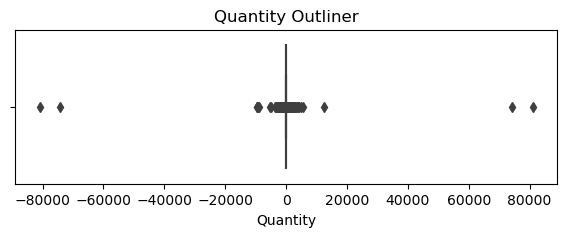

In [87]:
plt.figure(figsize=(7,2))
plt.title('Quantity Outliner')
sns.boxplot(data=df, x=df['Quantity']);

#### We can say we have extreme outliners as we've seen in earlier analysis that it can be mistake

In [88]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64